In [110]:
# 0) import our nedeed libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams['figure.figsize'] = (20, 10)

# Enhance our image by some transformer
## 1- Read our image

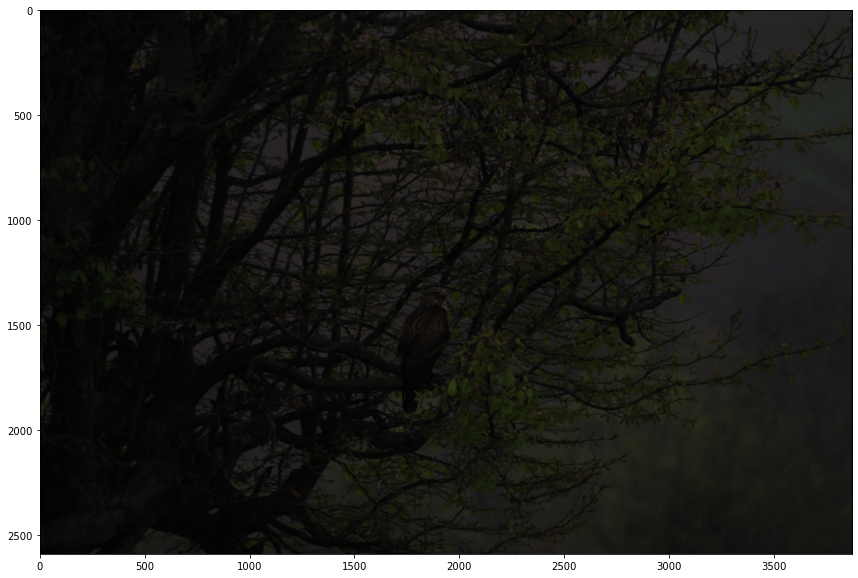

In [150]:
# 1) read and show our image
image_original = cv2.imread('./Enhance1.JPG')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

## 2- Define our transformation
### arbitrary transformation 

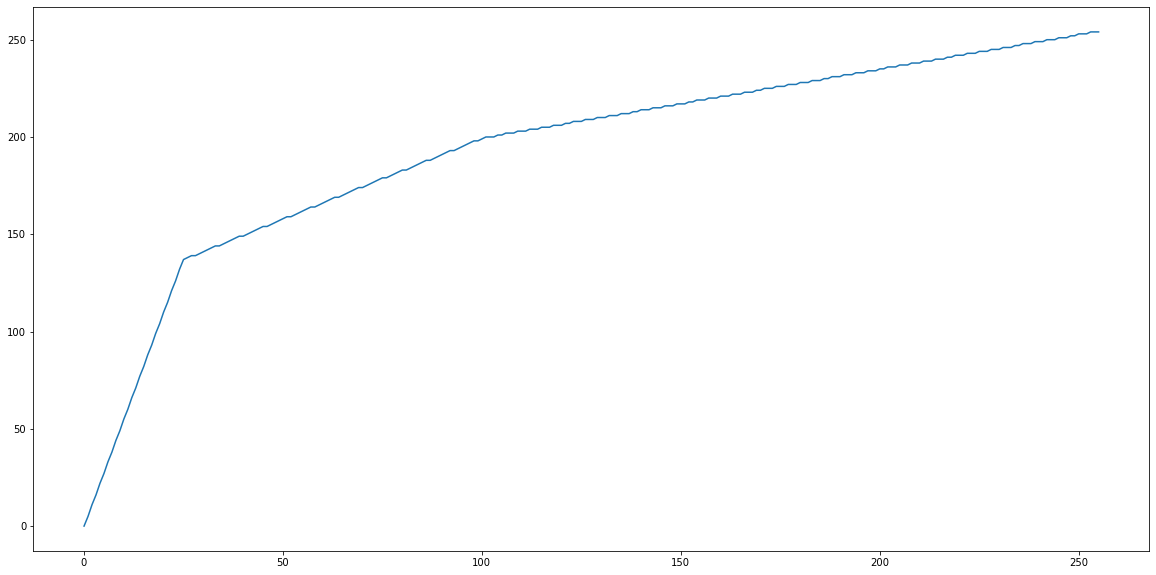

In [151]:
# 2) Define our transformation 
def arbitrary_transformation(image):
    trnsf = image.copy()
    trnsf[image<25] = 5.5 * image[image<25]
    trnsf[(image<100) & (image>=25)] = 0.83 * image[(image<100) & (image>=25)] + 116.75
    trnsf[image>=100] = 0.354 * image[image>=100] + 164.5
    return trnsf.astype(int)

plt.plot(arbitrary_transformation(np.array(range(256))))

### log transformation
\begin{align}
    y = \frac{255\,\log_2(1+\alpha x)}{\log_2(1+255\alpha)}
\end{align}

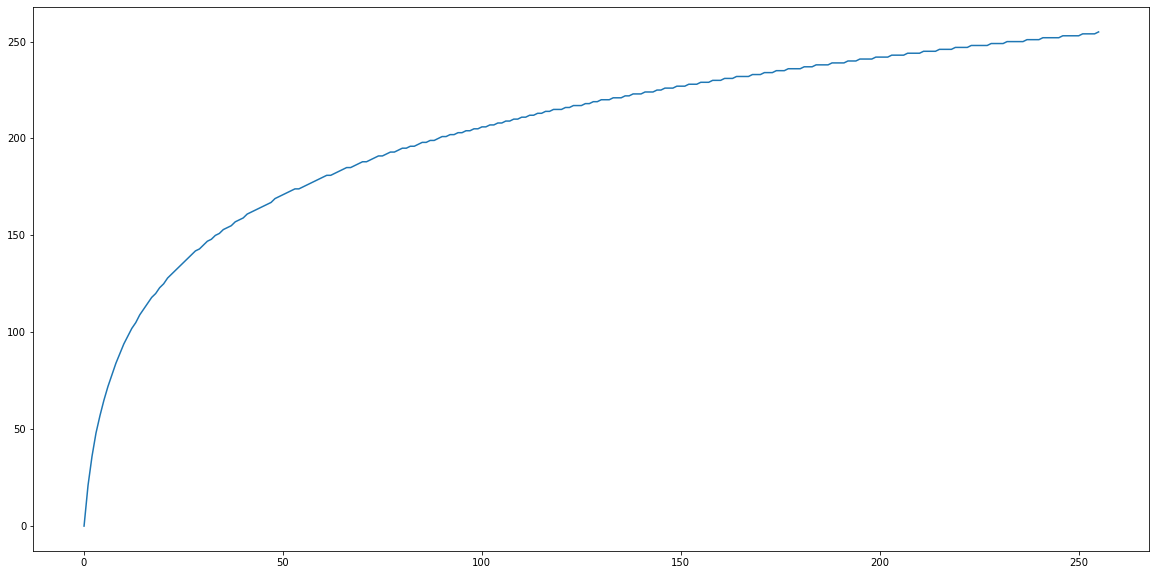

In [152]:
def log_transformation(image, a=0.5):    
    trnsf = 255 * np.log10(1 + a * image) / np.log10(1 + 255 * a)
    return trnsf.astype(int)

plt.plot(log_transformation(np.array(range(256))))

### Power law transformation 
\begin{align}
    y = 255(\frac{x}{255})^y
\end{align}


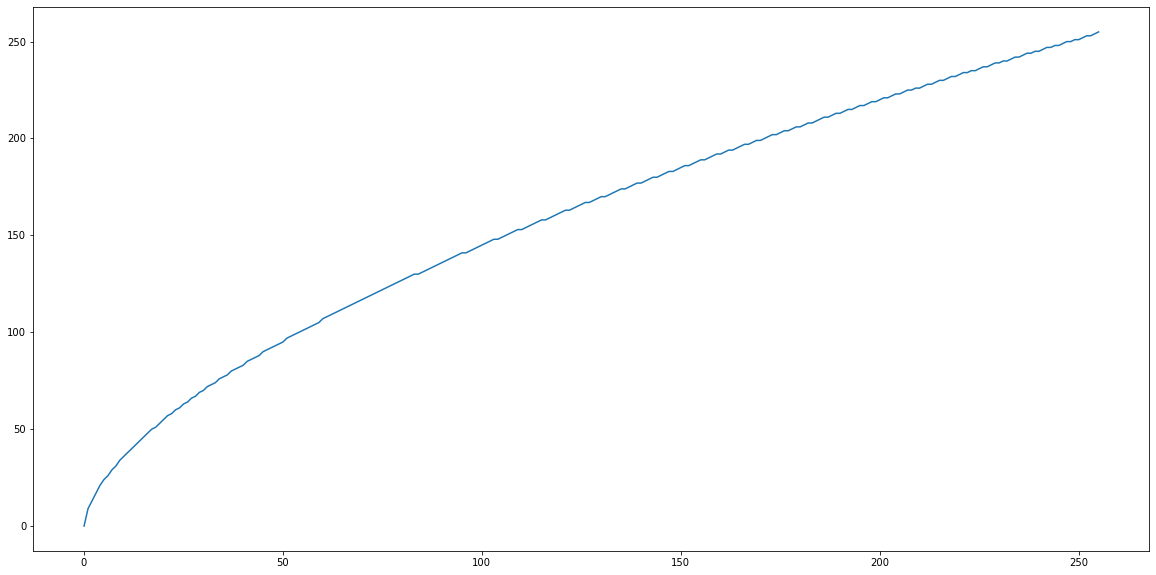

In [153]:
def power_law_transformation(image, y=0.6):    
    trnsf = 255 * (image / 255)**y
    return trnsf.astype(int)

plt.plot(power_law_transformation(np.array(range(256))))

### Negative transformation


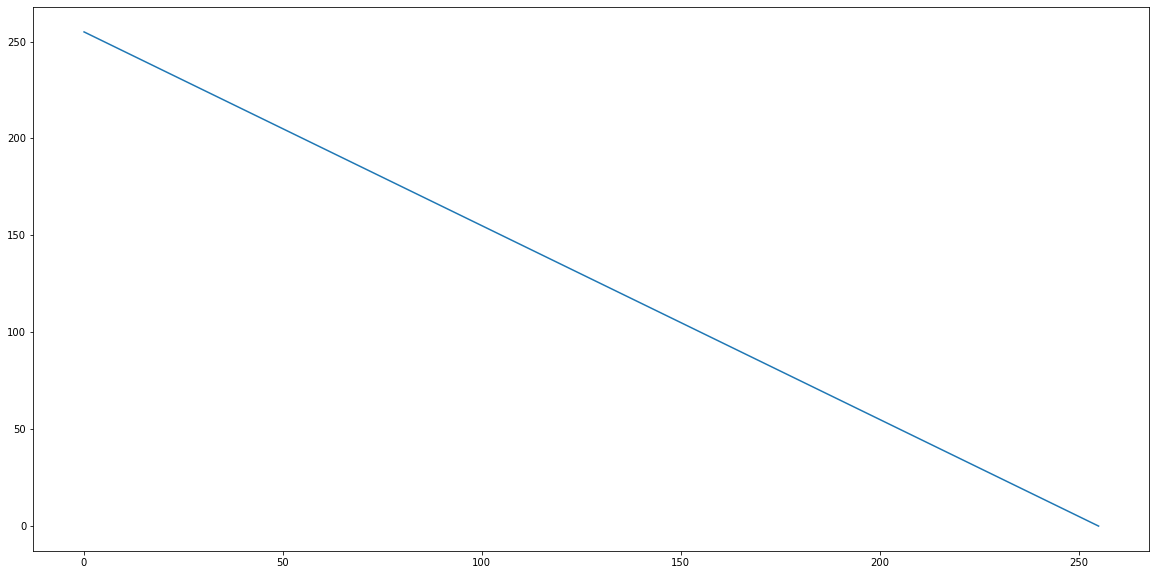

In [154]:
def negative_transformation(image):    
    trnsf = 255 - image
    return trnsf.astype(int)

plt.plot(negative_transformation(np.array(range(256))))

## 3- Apply transformation

In [155]:
def plot_result(image, transformed_image):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image)
    axs[0].set_title("original image")
    axs[1].imshow(transformed_image)
    axs[1].set_title("transformed image")
    plt.show()

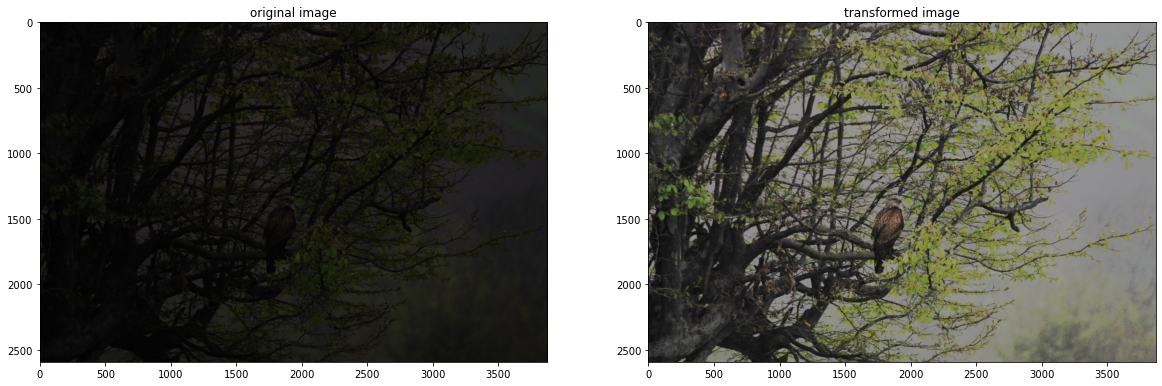

In [156]:
transformed_image = arbitrary_transformation(image_original)
plot_result(image_original, transformed_image)

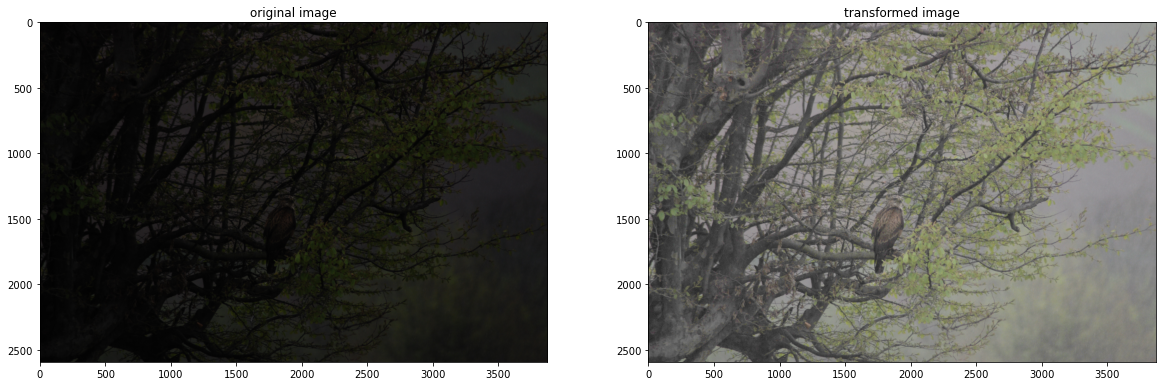

In [157]:
transformed_image = log_transformation(image_original)
plot_result(image_original, transformed_image)

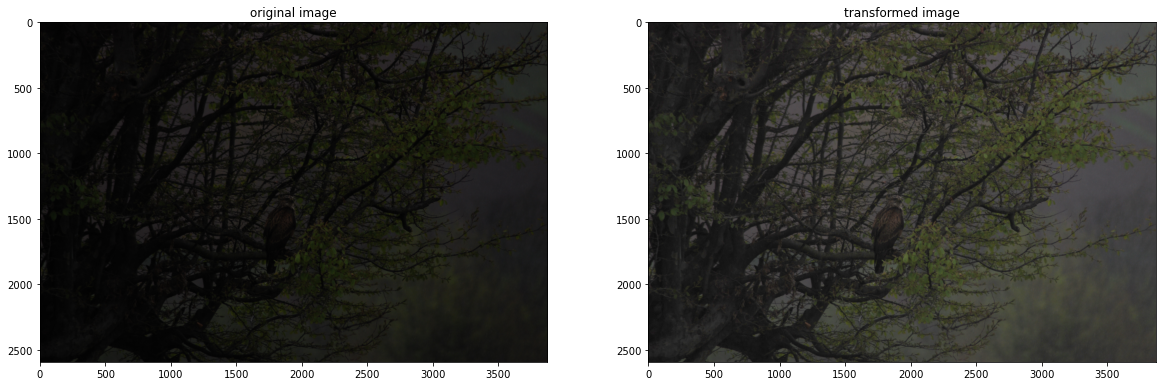

In [158]:
transformed_image = power_law_transformation(image_original)
plot_result(image_original, transformed_image)

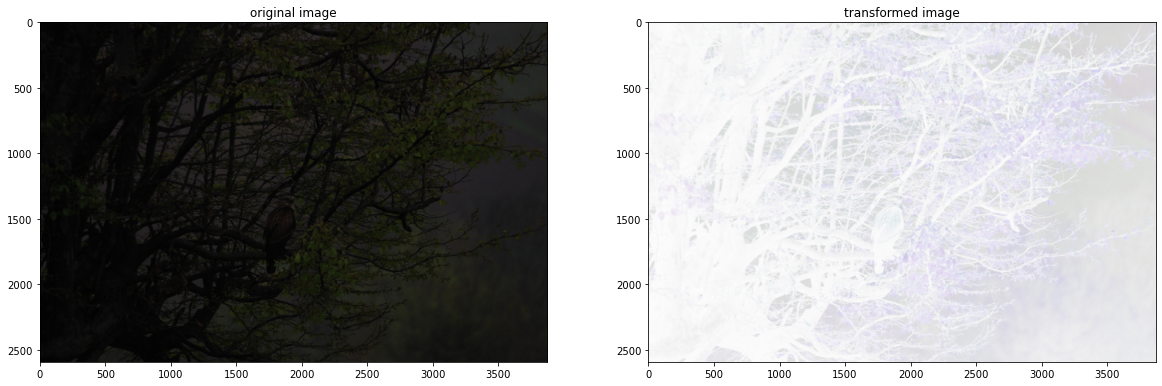

In [160]:
transformed_image = negative_transformation(image_original)
plot_result(image_original, transformed_image)

## another example

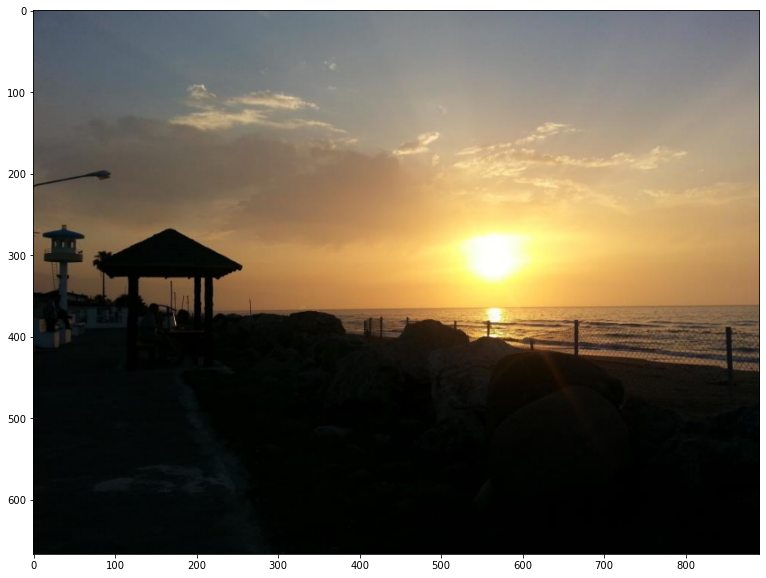

In [162]:
image_original = cv2.imread('./sunset.png')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

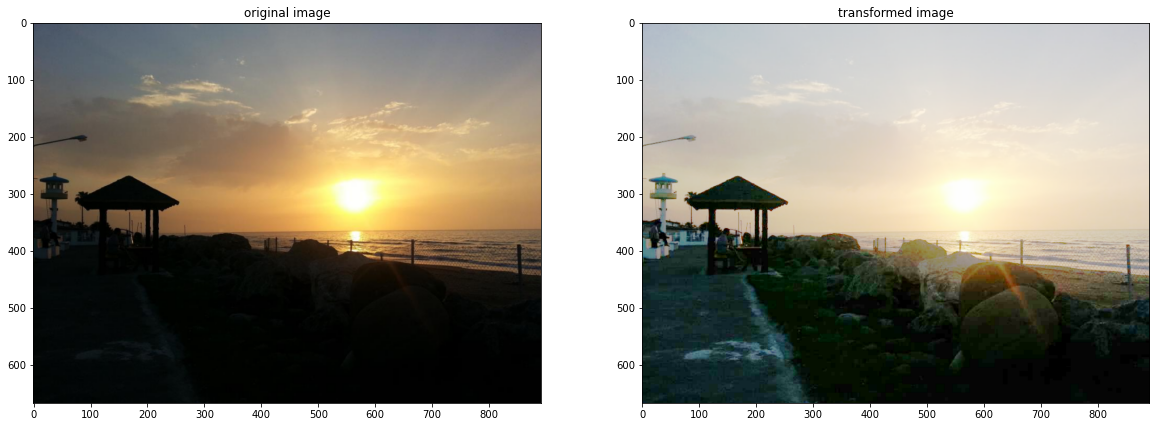

In [164]:
transformed_image = arbitrary_transformation(image_original)
plot_result(image_original, transformed_image)

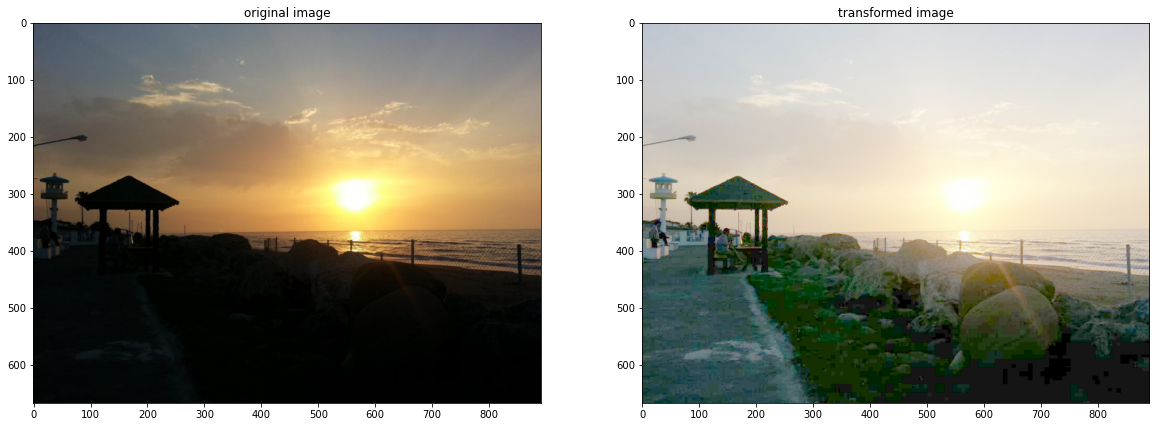

In [165]:
transformed_image = log_transformation(image_original)
plot_result(image_original, transformed_image)

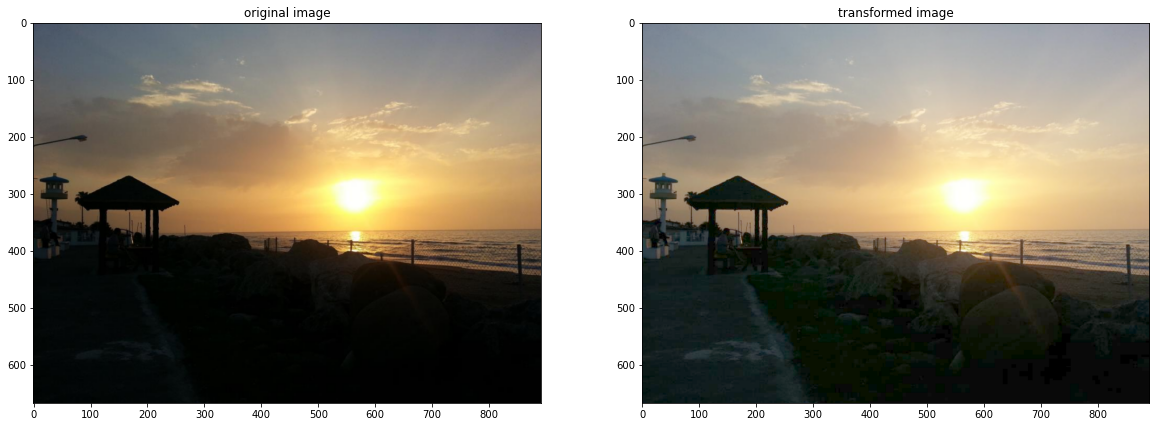

In [166]:
transformed_image = power_law_transformation(image_original)
plot_result(image_original, transformed_image)

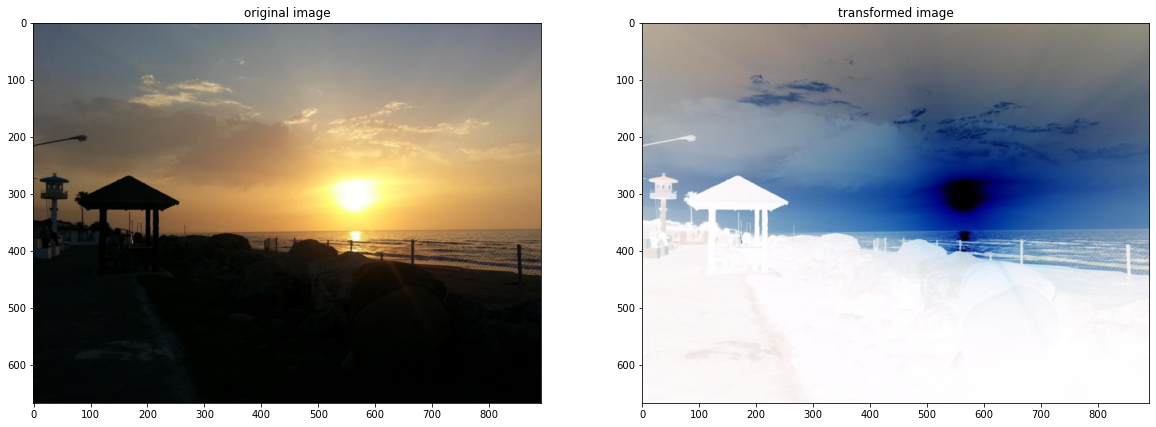

In [167]:
transformed_image = negative_transformation(image_original)
plot_result(image_original, transformed_image)

# Histogram Processing
## 1- Read our images

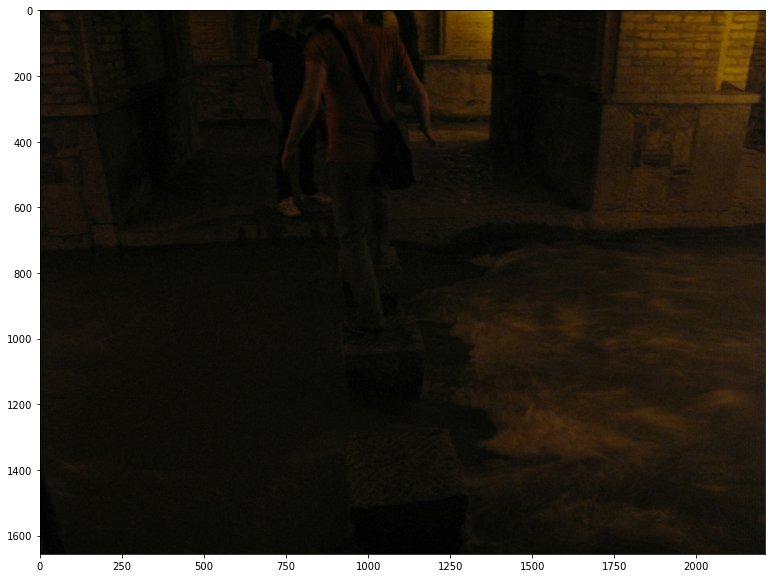

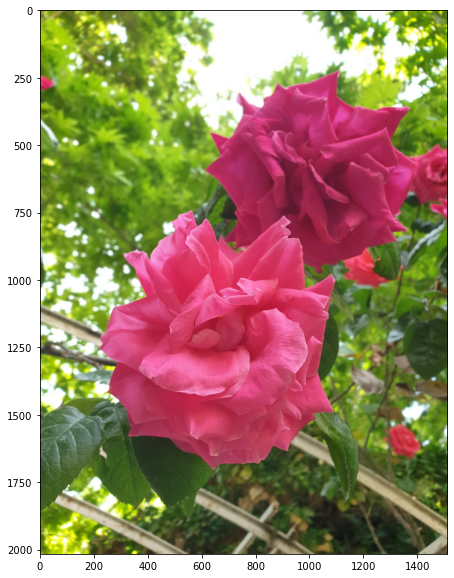

In [136]:
image_original = cv2.imread('./Dark.jpg')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)

fig = plt.figure()
pink_original = cv2.imread('./Pink.jpg')
pink_original = cv2.cvtColor(pink_original, cv2.COLOR_BGR2RGB)
plt.imshow(pink_original)

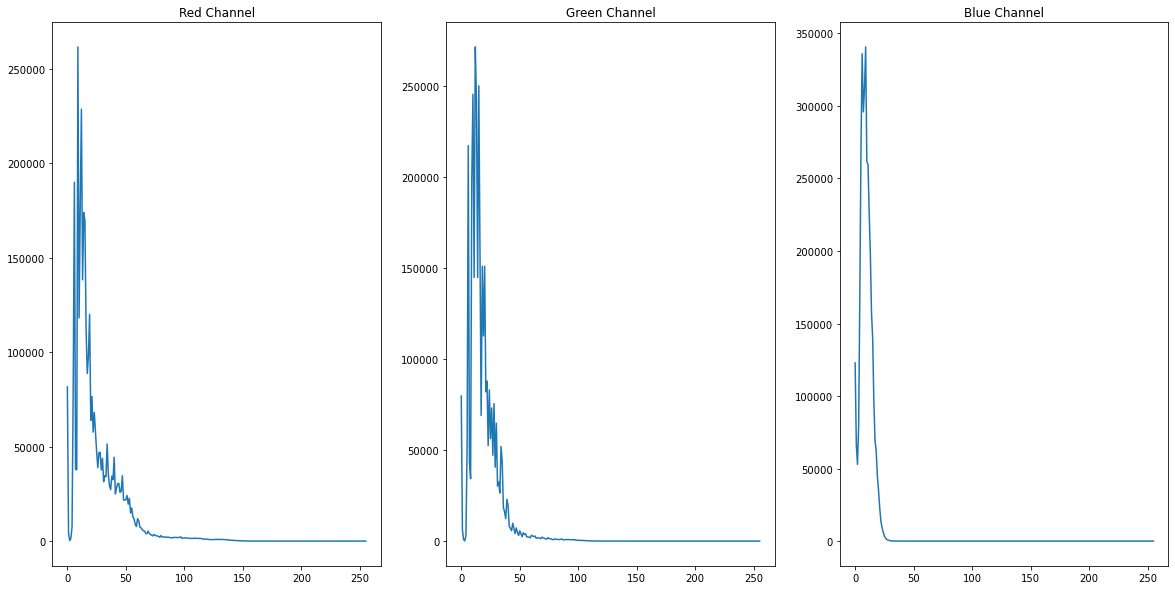

In [137]:
def plot_hist(image):
    fig, axs = plt.subplots(1, 3)
    axs[0].plot(range(256), cv2.calcHist([image],[0],None,[256],[0,256]))
    axs[0].set_title("Red Channel")
    axs[1].plot(range(256), cv2.calcHist([image],[1],None,[256],[0,256]))
    axs[1].set_title("Green Channel")
    axs[2].plot(range(256), cv2.calcHist([image],[2],None,[256],[0,256]))
    axs[2].set_title("Blue Channel")
    
plot_hist(image_original)

## 2- Histogram matching

In [138]:
from skimage.exposure import match_histograms
final_image = match_histograms(image_original, pink_original, multichannel=True)
# source : https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html

/tmp/ipykernel_3034/815974870.py:2: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  final_image = match_histograms(image_original, pink_original, multichannel=True)


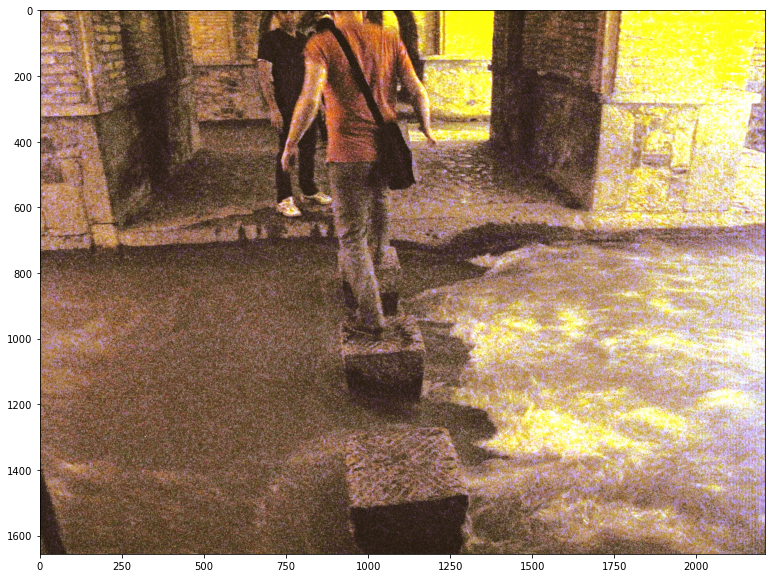

In [139]:
final_image = final_image.astype(np.uint8)
plt.imshow(final_image)